# Analisi dati finanziari di Spotify

## Domande di ricerca 
1) Quando l'apk di Spotify influenza i guadagni e il numero di utenti paganti 
2) Da dove arrivano i guadagni (ad vs premium)
3) Spotify è in perdita? 

## Librerie utilizzate 

* Numpy e pandas per la gestione dei dataset 
* Matplotlib per la visualizzazione dei dati 
* scipy.stats per le funzioni statistiche 
* ruptures per le analisi dei changepoint 
* statsmodels per la granger causality 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, kendalltau
import ruptures as rpt 
from statsmodels.tsa.stattools import grangercausalitytests

from itertools import islice, cycle

In [5]:
data_path = './data/'

quarterly_df = pd.read_csv(f'{data_path}spoty.csv')
apk_df = pd.read_csv(f'{data_path}apk.csv', parse_dates=['Date'])

# Dataset

## Dati finanziari Spotify
È stato utilizzato un dataset creato a partire dai dati pubblicati da Spotify sul sito (// TODO link sito), integrandoli con dati non pubblicati liberamente dall'azienda, ma presenti su un dataset di Kaggle (// TODO link kaggle).

## Download dell'apk
Per studiare il numero di download dell'apk si è fatto riferimento ai dati pubblicati da uno dei principali siti di download di software per Android (// TODO inserire link sito).

## Manipolazioni sui dataframe
Per semplificare la visualizzazione dei dati, si inserisce nel dataframe relativo a Spotify una colonna aggiuntiva (denominata `Date`) per indicare insieme anno e trimestre (*quarter*).


In [6]:
quarterly_df['Date'] = quarterly_df['Year'].astype(str) + ' – Q' + quarterly_df['Quarter'].astype(str)
quarterly_df = quarterly_df.sort_values('Date')

## Visualizzazione di alcuni dati non processati
Si riportano qui di seguito alcune visualizzazioni dei dati presenti nel dataset, al fine di offrire una panoramica su alcuni aspetti rilevanti per la successiva analisi.

In [9]:
# gross profit, premium gross profit, ad gross profit
# Total Revenue, Premium Revenue, Ad Revenue
# MAUs, Premium MAUs, Ad MAUs 

Index(['Year', 'Quarter', 'Total Revenue', 'Cost of Revenue', 'Gross Profit',
       'Premium Revenue', 'Premium Cost Revenue', 'Premium Gross Profit',
       'Ad Revenue', 'Ad Cost of revenue', 'Ad gross Profit', 'MAUs',
       'Premium MAUs', 'Ad MAUs', 'Premium ARPU', 'Sales and Marketing Cost',
       'Research and Development Cost', 'General and Adminstraive Cost'],
      dtype='object')

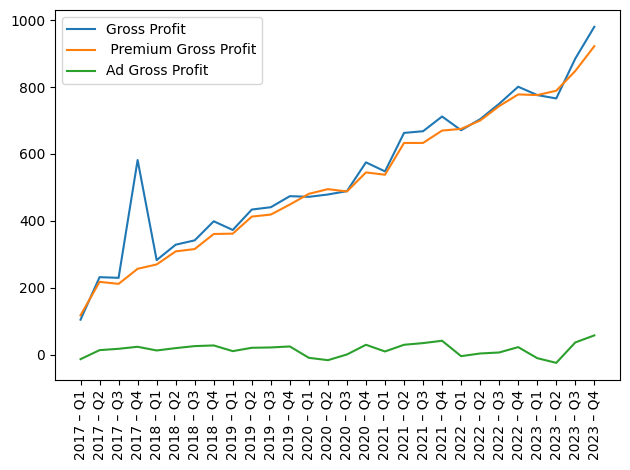

In [9]:
plt.figure()
plt.plot(quarterly_df['Date'], quarterly_df['Gross Profit'], label='Gross Profit')
plt.plot(quarterly_df['Date'], quarterly_df['Premium Gross Profit'], label=' Premium Gross Profit')
plt.plot(quarterly_df['Date'], quarterly_df['Ad Gross Profit'], label='Ad Gross Profit')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

quarterly_df


# Metodo proposto

* Calcolo dei changepoint 
...

* Calcolo dei coefficienti di correlazione
... 

# Quarterly APK downloads

In order to compare apk downloads with financial metrics, it is necessary to aggregate data by quarter.

In [64]:
apk_df.set_index('Date', inplace=True)
apk_quarterly_df = apk_df['Downloads'].resample('QE').sum().to_frame()
apk_df.reset_index(inplace=True)
apk_quarterly_df.reset_index(inplace=True)

In [65]:
apk_quarterly_df['Year'] = apk_quarterly_df['Date'].dt.year 
apk_quarterly_df['Quarter'] = apk_quarterly_df['Date'].dt.quarter 
apk_quarterly_df['Date'] = apk_quarterly_df['Year'].astype(str) + ' – Q' + apk_quarterly_df['Quarter'].astype(str)

# Quarterly financial data

We create a ```Date``` field to store in a single value the information about year and quarter.

In [66]:
quarterly_df['Date'] = quarterly_df['Year'].astype(str) + ' – Q' + quarterly_df['Quarter'].astype(str)
quarterly_df = quarterly_df.sort_values('Date')

quarterly_df['Marginal Premium MAUs'] = quarterly_df['Premium MAUs'].diff()

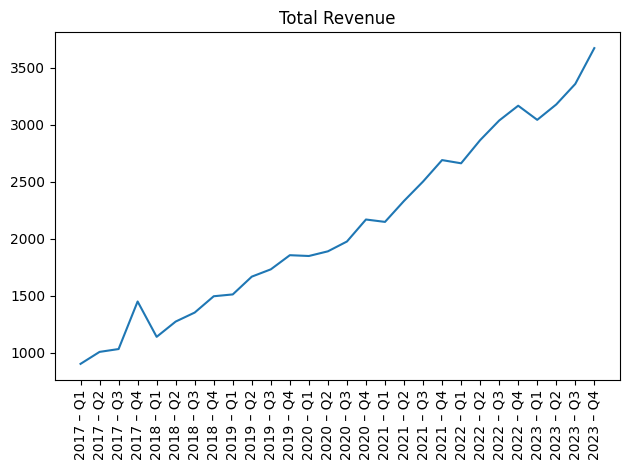

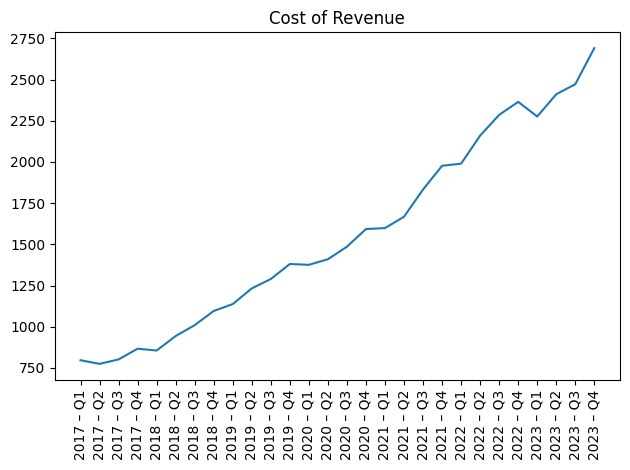

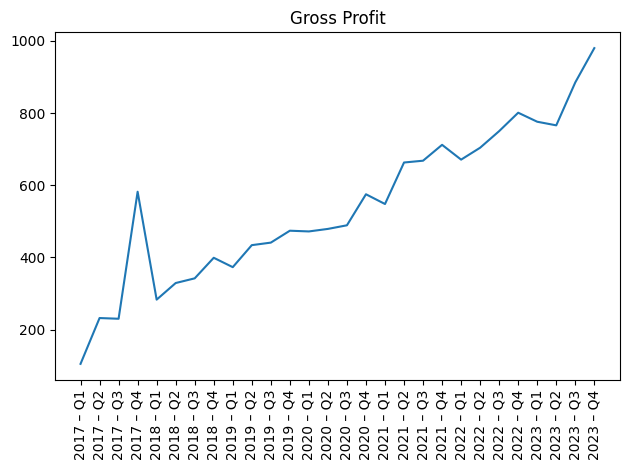

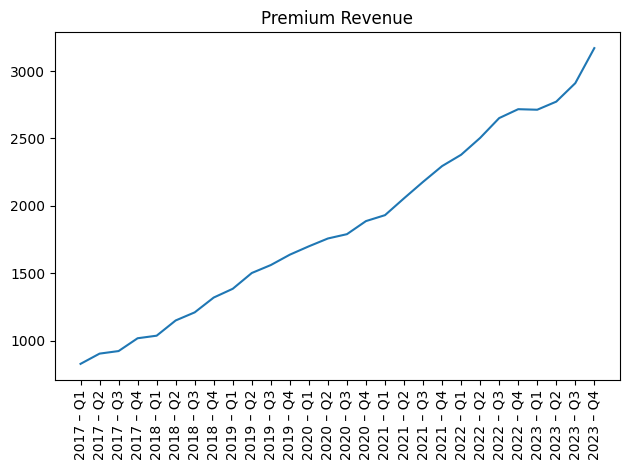

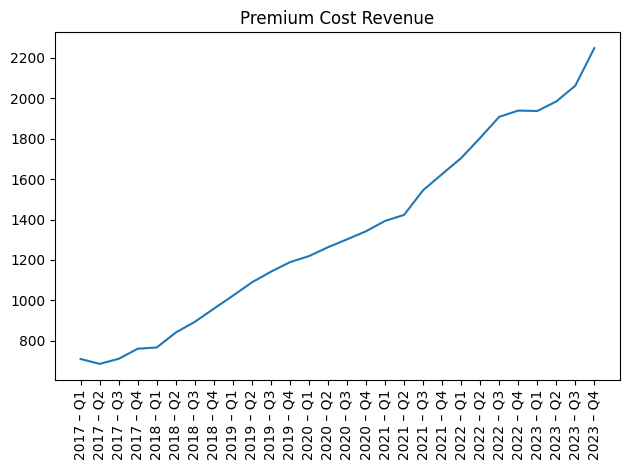

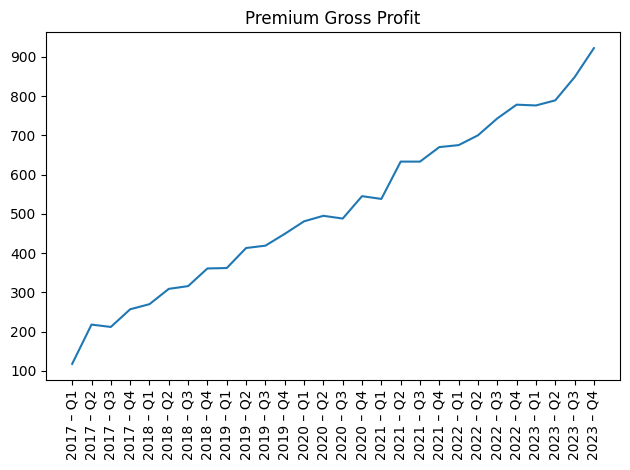

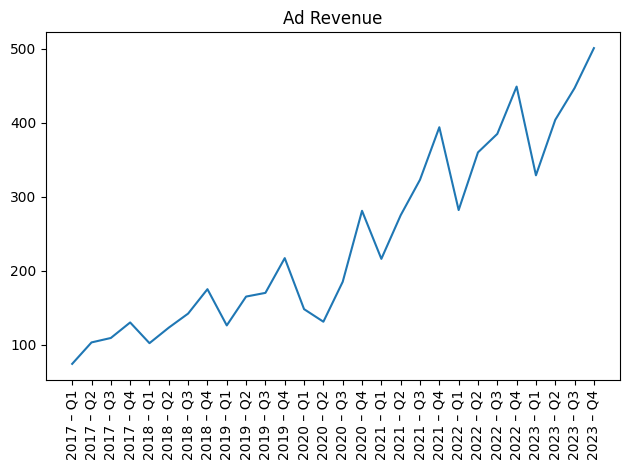

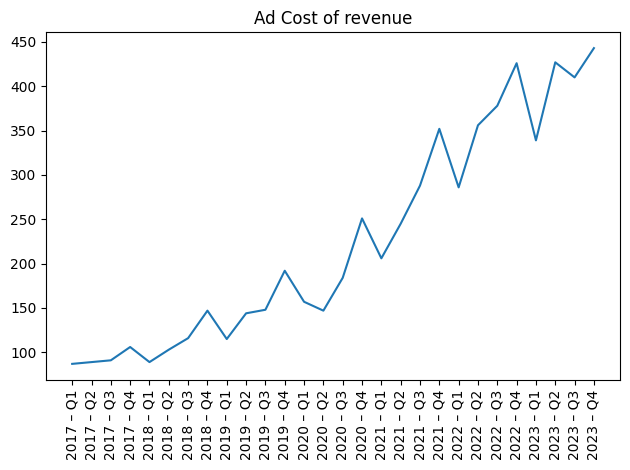

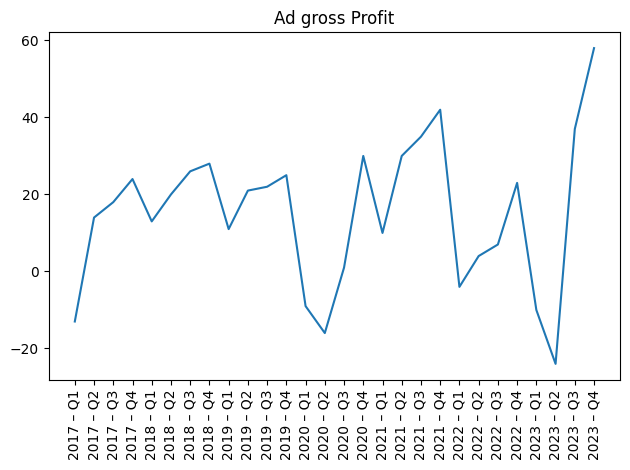

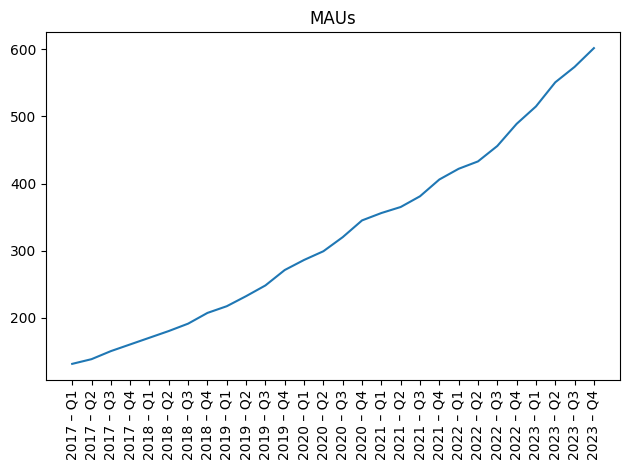

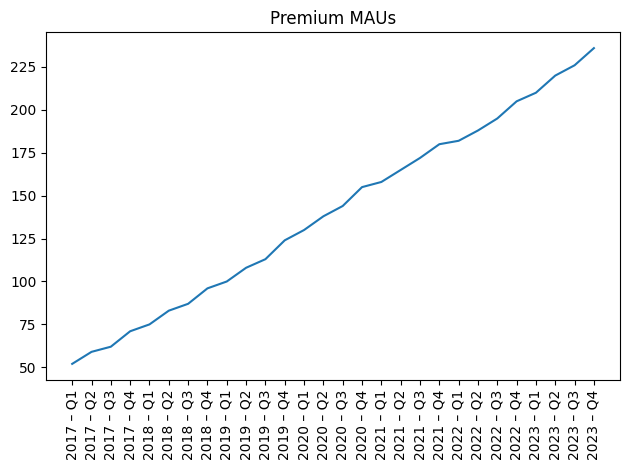

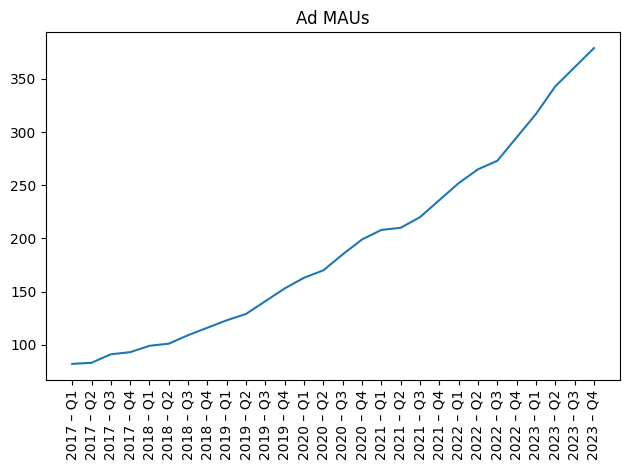

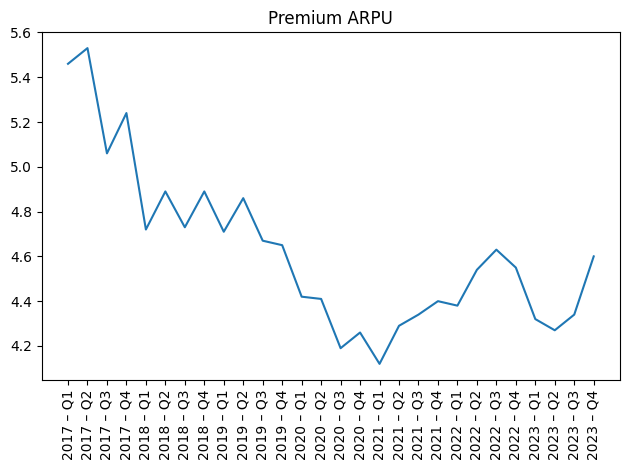

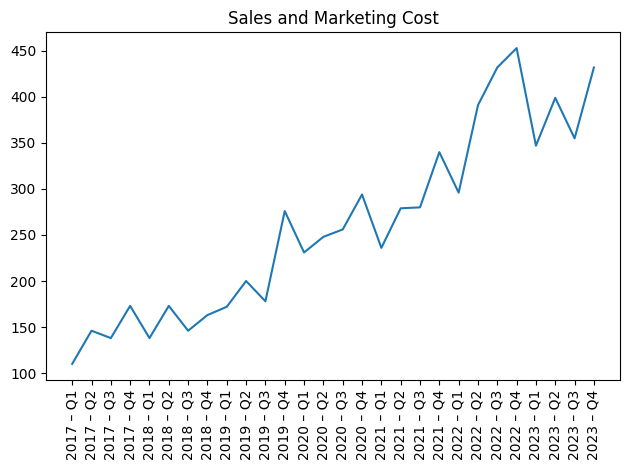

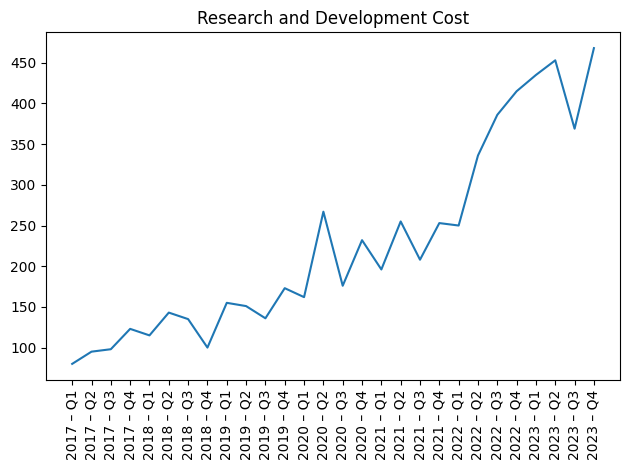

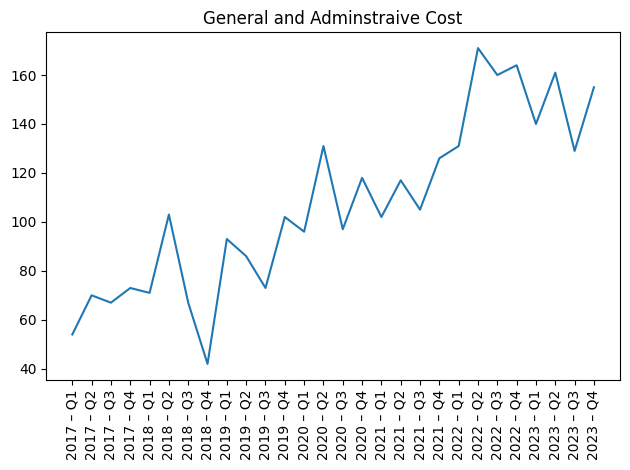

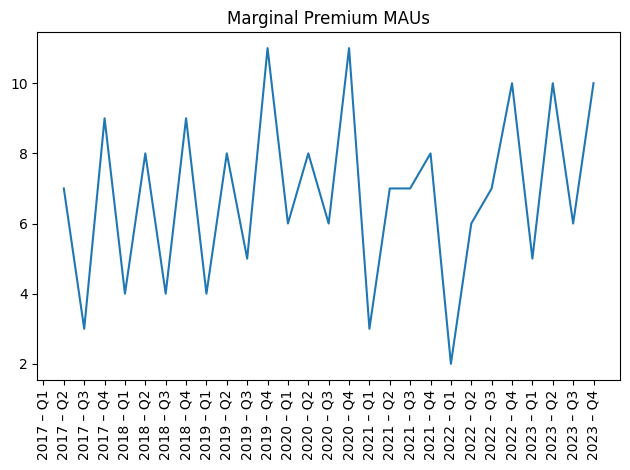

In [67]:
for metric in quarterly_df.columns.drop(['Date', 'Year', 'Quarter']):
    plt.figure()
    plt.plot(quarterly_df['Date'], quarterly_df[metric])
    plt.title(metric)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [68]:
def generate_colors(n):
    color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
    n = min(n, len(color_cycle))

    return color_cycle[:n]

In [69]:
events = {'Event': ['Harry Style\'s Fine Line',
                    'The Weeknd\'s After Hours',
                    'Taylor Swift\'s Fearless'],
          'Date': ['2019-12-13',
                   '2020-03-20',
                   '2021-04-09']}
events_df = pd.DataFrame(events)

generate_colors(len(events_df))

['#1f77b4', '#ff7f0e', '#2ca02c']

In [70]:
# events = {'Event': ['Harry Style\'s Fine Line',
#                     'The Weeknd\'s After Hours',
#                     'Taylor Swift\'s Fearless'],
#           'Date': ['2019-12-13',
#                    '2020-03-20',
#                    '2021-04-09']}

# events_df = pd.DataFrame(events)
# events_df['Date'] = pd.to_datetime(events_df['Date'])

# ymin = apk_df['Downloads'].min()
# ymax = apk_df['Downloads'].max()

# colors = generate_colors(len(events_df) + 1)[1:]

# plt.figure(figsize=(10, 6))
# for index, row in events_df.iterrows():
#     plt.vlines(x=row['Date'], ymin=ymin, ymax=ymax, color=colors[index], linestyles='--', label=row['Event'])

# plt.scatter(apk_df['Date'], apk_df['Downloads'], marker='o', s=5)
# plt.title('APK downloads')
# plt.xlabel('Release date')
# plt.ylabel('# of downloads')
# plt.legend()
# plt.show()

# Correlation between Premium MAUs and APK downloads

It is first necessary to truncate the two series, in order to compare them in the same time interval (2017Q3 – 2023Q4).

In [71]:
start_date = max(quarterly_df['Date'].min(), apk_quarterly_df['Date'].min())
end_date = min(quarterly_df['Date'].max(), apk_quarterly_df['Date'].max())

trunc_quarterly_df = quarterly_df[
    (quarterly_df['Date'] >= start_date) &
    (quarterly_df['Date'] <= end_date)
]

trunc_apk_quarterly_df = apk_quarterly_df[
    (apk_quarterly_df['Date'] >= start_date) &
    (apk_quarterly_df['Date'] <= end_date)
]

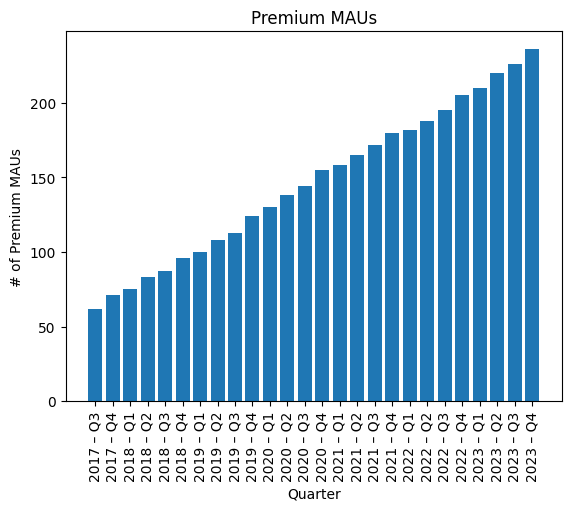

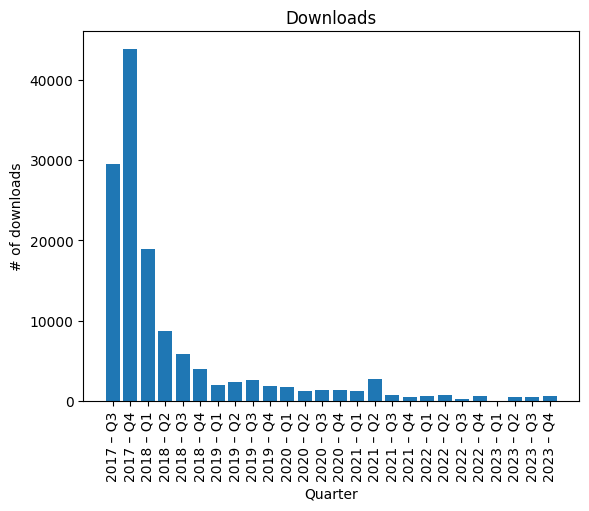

In [72]:
plt.figure()
plt.bar(trunc_quarterly_df['Date'], trunc_quarterly_df['Premium MAUs'])
plt.title('Premium MAUs')
plt.xlabel('Quarter')
plt.ylabel('# of Premium MAUs')
plt.xticks(rotation=90)
plt.show()

plt.figure()
plt.bar(trunc_apk_quarterly_df['Date'], trunc_apk_quarterly_df['Downloads'])
plt.title('Downloads')
plt.xlabel('Quarter')
plt.ylabel('# of downloads')
plt.xticks(rotation=90)
plt.show()

In [73]:
pearson_corr_maus, pearson_pvalue = pearsonr(trunc_quarterly_df['Premium MAUs'], trunc_apk_quarterly_df['Downloads'])
print(f'Pearson correlation: {pearson_corr_maus}')
print(f'p-value: {pearson_pvalue}')

Pearson correlation: -0.6223810216218667
p-value: 0.0006859359176054387


In [74]:
spearman_corr_maus, spearman_pvalue = spearmanr(trunc_quarterly_df['Premium MAUs'], trunc_apk_quarterly_df['Downloads'])
print(f'Spearman correlation: {spearman_corr_maus}')
print(f'p-value: {spearman_pvalue}')

Spearman correlation: -0.9206837606837606
p-value: 2.7168222882982103e-11


In [75]:
kendalltau_corr_maus, kendalltau_pvalue = kendalltau(trunc_quarterly_df['Premium MAUs'], trunc_apk_quarterly_df['Downloads'])
print(f'Kendall Tau correlation: {kendalltau_corr_maus}')
print(f'p-value: {kendalltau_pvalue}')

Kendall Tau correlation: -0.7846153846153847
p-value: 1.030182378596434e-10


# Correlation between marginal Premium MAUs and apk downloads

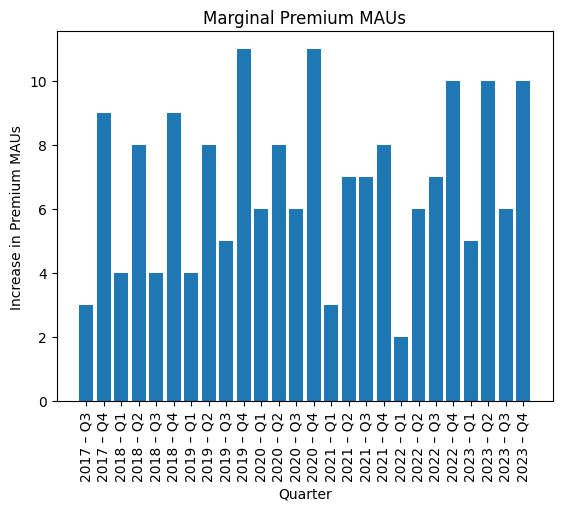

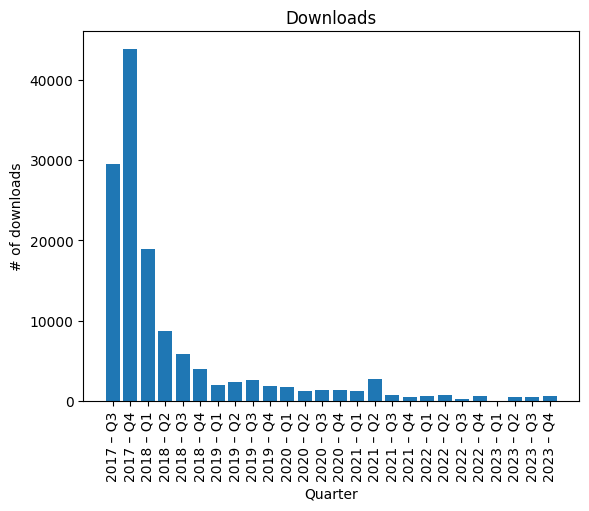

In [76]:
plt.figure()
plt.bar(trunc_quarterly_df['Date'], trunc_quarterly_df['Marginal Premium MAUs'])
plt.title('Marginal Premium MAUs')
plt.xlabel('Quarter')
plt.ylabel('Increase in Premium MAUs')
plt.xticks(rotation=90)
plt.show()

plt.figure()
plt.bar(trunc_apk_quarterly_df['Date'], trunc_apk_quarterly_df['Downloads'])
plt.title('Downloads')
plt.xlabel('Quarter')
plt.ylabel('# of downloads')
plt.xticks(rotation=90)
plt.show()

In [77]:
pearson_corr_marginal_maus, pearson_marginal_pvalue = pearsonr(trunc_quarterly_df['Marginal Premium MAUs'], trunc_apk_quarterly_df['Downloads'])
print(f'Pearson correlation: {pearson_corr_marginal_maus}')
print(f'p-value: {pearson_marginal_pvalue}')

Pearson correlation: -0.09670169273907739
p-value: 0.6383997581432619


In [78]:
spearman_corr_marginal_maus, spearman_marginal_pvalue = spearmanr(trunc_quarterly_df['Marginal Premium MAUs'], trunc_apk_quarterly_df['Downloads'])
print(f'Pearson correlation: {spearman_corr_marginal_maus}')
print(f'p-value: {spearman_marginal_pvalue}')

Pearson correlation: -0.1228093718374692
p-value: 0.5500538723379269


In [79]:
kendalltau_corr_marginal_maus, kendalltau_marginal_pvalue = kendalltau(trunc_quarterly_df['Marginal Premium MAUs'], trunc_apk_quarterly_df['Downloads'])
print(f'Pearson correlation: {kendalltau_corr_marginal_maus}')
print(f'p-value: {kendalltau_marginal_pvalue}')

Pearson correlation: -0.08326663997864531
p-value: 0.5635104573765848


<Figure size 1000x800 with 0 Axes>

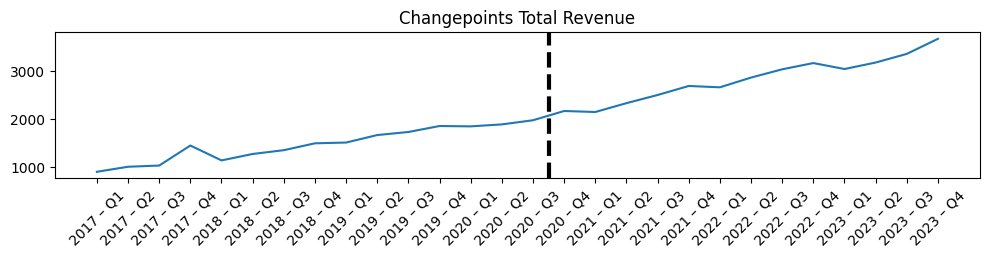

<Figure size 1000x800 with 0 Axes>

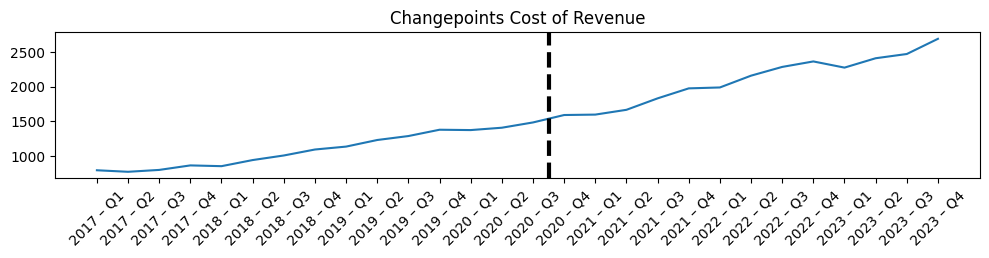

<Figure size 1000x800 with 0 Axes>

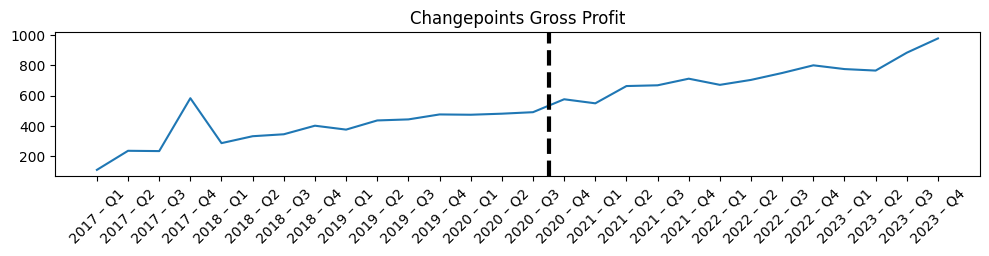

<Figure size 1000x800 with 0 Axes>

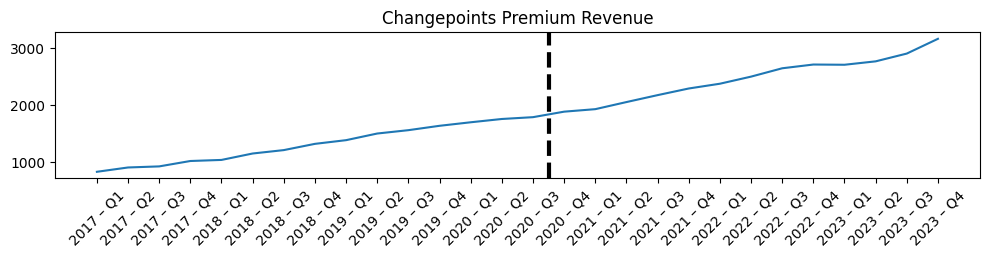

<Figure size 1000x800 with 0 Axes>

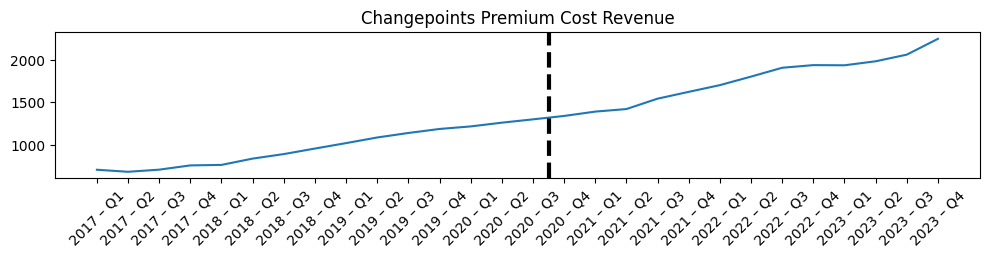

<Figure size 1000x800 with 0 Axes>

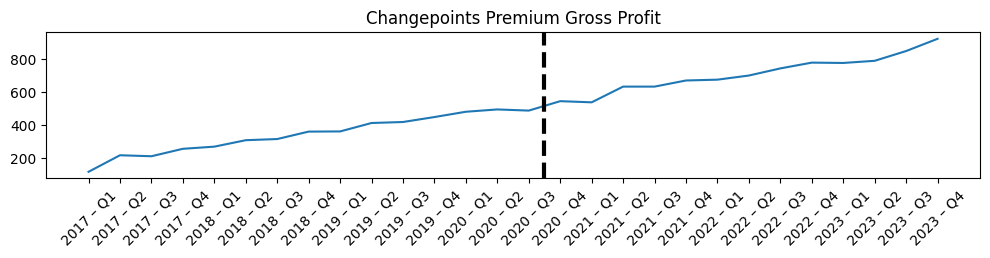

<Figure size 1000x800 with 0 Axes>

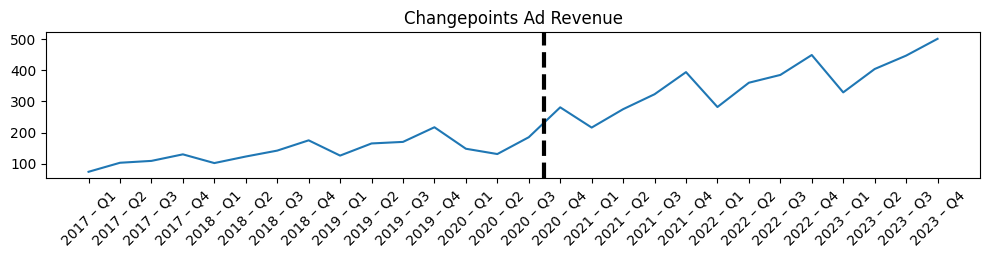

<Figure size 1000x800 with 0 Axes>

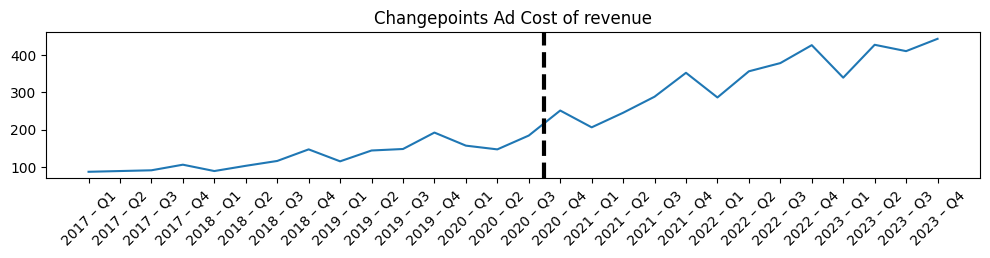

<Figure size 1000x800 with 0 Axes>

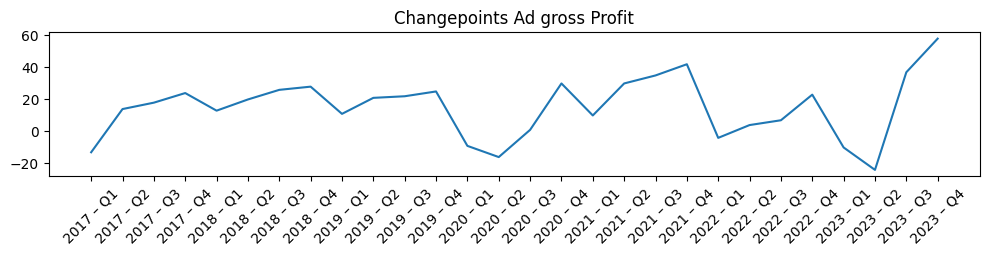

<Figure size 1000x800 with 0 Axes>

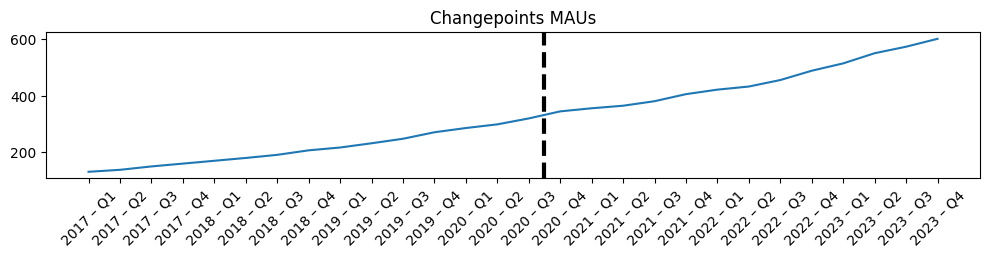

<Figure size 1000x800 with 0 Axes>

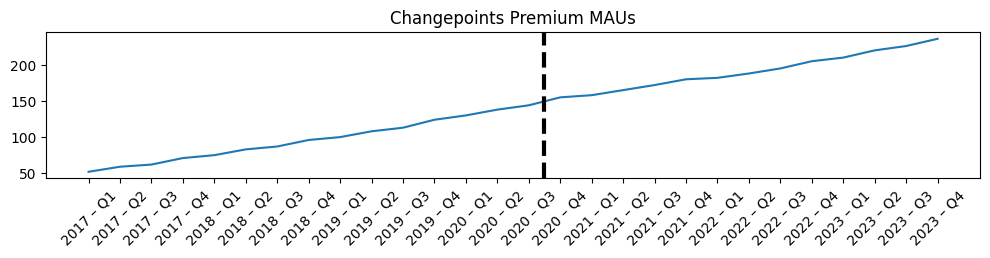

<Figure size 1000x800 with 0 Axes>

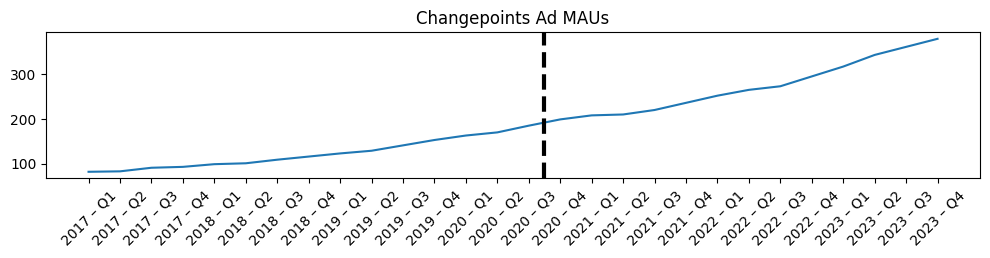

<Figure size 1000x800 with 0 Axes>

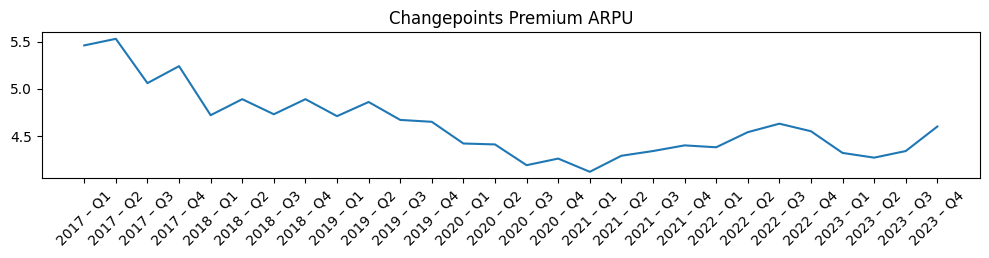

<Figure size 1000x800 with 0 Axes>

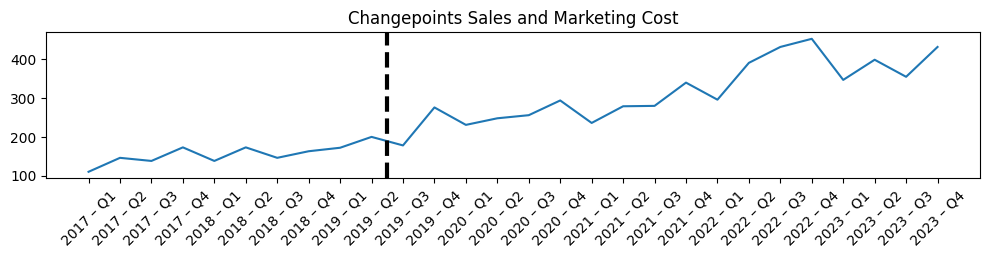

<Figure size 1000x800 with 0 Axes>

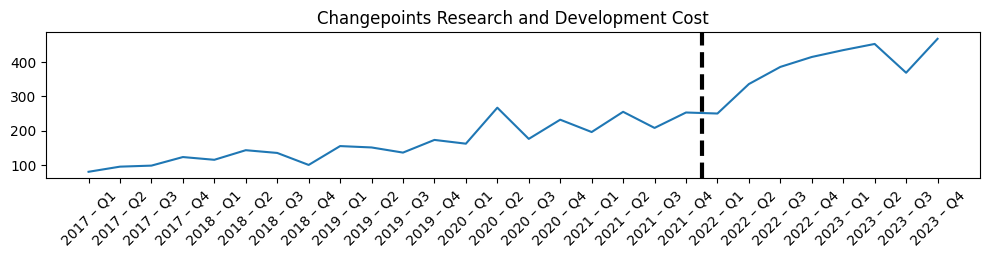

<Figure size 1000x800 with 0 Axes>

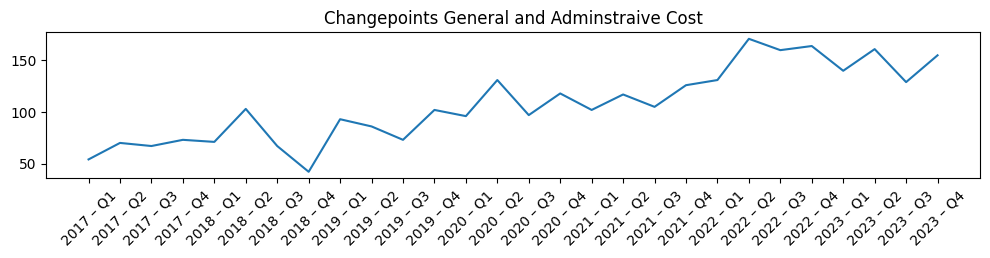

<Figure size 1000x800 with 0 Axes>

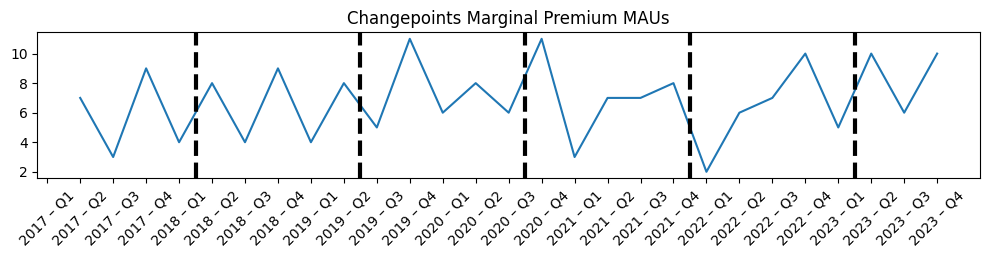

In [80]:
for feature in quarterly_df.columns.drop(['Year', 'Quarter', 'Date']):
    algo = rpt.Pelt(model='rbf').fit(quarterly_df[feature].values)
    result = algo.predict(pen=6)

    plt.figure(figsize=(10,8))
    rpt.display(quarterly_df[feature].values, [], result)
    plt.title(f'Changepoints {feature}')
    plt.xticks(np.arange(len(quarterly_df['Date'])), quarterly_df['Date'], rotation=45)
    plt.show()